__Type II errors and power of a test__

|  | do not reject $H_0$ | reject $H_0$ in favor of $H_1$ |  |
|--|--|--|--|
| $H_0$ is true | correct | type I error | $\alpha$ |
| $H_0$ is false | type II error | correct |  |
| | $\beta$ | | |

$\alpha = P(\mbox{reject}\; H_0 | H_0 \;\mbox{is true})$

$\beta = P(\mbox{not reject}\; H_0 | H_0 \;\mbox{is false})$

We have the following trade-off; if Alpha increases, then Beta decreases and vice versa.

In scientific settings we usually just fix this Alpha and then analyze the design of our experiment to find this Beta and check if this Beta is on appropriate level.

1 sample t test

$x_1, x_2, \ldots, x_n \sim i.i.d. \sim X$

$\bar{x}$

$H_0: \mathbb{E}X = \mu_0$

$H_1: \mathbb{E}X > \mu_0$

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

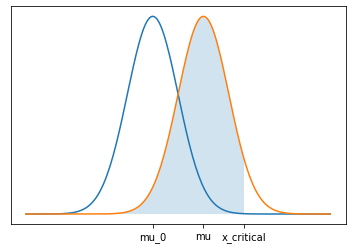

In [35]:
x = np.linspace(-5, 7, 200)

d1 = norm()
d2 = norm(loc=2)

fig, ax = plt.subplots()

mu0 = 0
mu = 2
alpha = 3.6

plt.xticks([mu0, mu, alpha], ['mu_0', 'mu', 'x_critical'])
plt.yticks([])

ax.plot(x, d1.pdf(x))
ax.plot(x, d2.pdf(x))

beta = np.linspace(-5, alpha, 200)
ax.fill_between(beta, d2.pdf(beta), alpha=0.2)

plt.show()

# the shadowed area is beta

To find beta we have to know

1. Type of a test
2. VarX (approximated by Var x), (to draw the distribution)
3. Sample size
4. Magnitude of an effect ($\delta = \mu - \mu_0$)
5. Significant level $\alpha$

Power of a test = 1-$\beta$

Consider binomial test (like we discussed on the previous week). Let $X$ be binomially distributed random variable with $n$ trials and probability of succcess $p$. Null hypothesis is $p=1/2$, alternative is $p>1/2$. We perform a test with significance level 5%. Let $n=10$. For which values of $X_{obs}$ sampled from $X$ would you reject null hypothesis? (In other words: how many times a magician have to guess the result of coin tossing correctly if we toss a coin 10 times?) Mark all appropriate values.

In [36]:
p_ge10 = 0.5**10
p_ge9 = 10 * 0.5**10 + p_ge10
p_ge8 = (10 * 9/2) * 0.5**10 + p_ge9 + p_ge10

print(p_ge10,p_ge9,p_ge8)

0.0009765625 0.0107421875 0.0556640625


In [50]:
from scipy.stats import binom

rv = binom(10, 0.5)

1-rv.cdf(8) # note this value does not include k=8

0.0107421875

magician have to guess the result of coin tossing correctly __9, 10__ times, significant level 5%

Assume that correct value of $p$ equals to $2/3$ (but you don't know it). What is the probability to reject null hypothesis using the criteria you stated in the previous question? Enter numeric value with two digits after the decimal point.

In [47]:
rv = binom(10, 2/3)

# rv.pmf(9) + rv.pmf(10)
# 10 * (2/3)**9 * 1/3 + (2/3)**10
1-rv.cdf(8) # note this value does not include k=8

0.10404917949499559

What is the probability to not reject null hypothesis in this case? Enter numeric value with 2 digits after the decimal point.

In [48]:
# this is type II error beta. probability of not reject null hypothesis when it's false
rv.cdf(8)

0.8959508205050044

What is the power of our test under these conditions? Enter numeric value with 2 digits after the decimal point.

In [52]:
# power of a test is 1-beta
1-rv.cdf(8)

0.0107421875

What is the power of our test if pp equals to $3/4$? Enter numeric value with 2 digits after the decimal point.

In [53]:
rv = binom(10, 3/4)

1-rv.cdf(8)

0.24402523040771484

_example_

Consider binomial test (like we discussed on the previous week). Let $X$ be binomially distributed random variable with nn trials and probability of succcess $p$. Null hypothesis is $p=1/2$, alternative is $p\ne 1/2$. We perform a test with significance level 5%. Let $n=10$. For which values of $X_{obs}$ sampled from $X$ would you reject null hypothesis? (In other words: how many times a magician have to guess the result of coin tossing correctly if we toss a coin 10 times?) Mark all appropriate values.

In [58]:
from scipy.stats import binom

rv = binom(10, 0.5)

rv.cdf(1)*2  # 0, 1, 9, 10

0.021484374999999997

Assume that correct value of pp equals to $2/3$ (but you don't know it). What is the probability to reject null hypothesis using the criteria you stated in the previous question? Enter numeric value with 8 digits after the decimal point.

In [69]:
rv2 = binom(10, 2/3)

(1-rv2.cdf(8)) + rv2.cdf(1)

0.10440481633897263

What is the power of our test under these conditions? Enter numeric value with 8 digits after the decimal point.

same as above, which is $1-\beta$

What is the power of our test if pp equals to $3/4$? Enter numeric value with 6 digits after the decimal point.

In [71]:
rv3 = binom(10, 3/4)

(1-rv3.cdf(8)) + rv3.cdf(1)

0.24405479431152344

_example_

Question 1
Assume that we want to perform one-sample t-test with null hypothesis $\mathbb EX=0$ and an alternative $\mathbb EX > 0$. We have an i.i.d. sample $x=(x_1, \ldots, x_{n})$ from $X$. Let $n=100$. To simplify calculations, let us assume that we have large enough sample to reliably estimate variance of $X$ from the data and apply central limit theorem. In other words, we will assume that sample mean $\bar x$ is distributed under normal law with expected value $\mathbb EX$ and variance that is equal to $\mathrm{\mathop{Var}}_{+}(x)/n$, where $\mathrm{\mathop{Var}}_{+}(x)$ is unbiased sample variance of $x$. Assume that $\mathrm{\mathop{Var}}_{+}(x)=5$.

Find value $x_{crit}$ such that probability to observe $\bar x\ge x_{crit}$ is equal to 0.05. (Use scipy.stats.norm.ppf.) Enter numeric value with 2 digits after the decimal point.

In [80]:
import numpy as np
from scipy.stats import norm

x = norm(loc=0, scale = np.sqrt(5/100))

x.ppf(0.95)

0.3678004522900572

Assume that correct $\mathbb EX=0.5$. Find probability to observe $\bar x < x_{crit}$ in this case. (Use $x_{crit}$ found previously. Take into account correct distribution of $\bar x$ Enter numeric value with two digits after the decimal point.

In [86]:
x1= norm(loc=0.5, scale = np.sqrt(5/100))

x1.cdf(0.3678)

0.27718772676070075

Find probability to not reject null hypothesis under these conditions. Enter numeric value with two digits after the decimal point.

same as above

Find probability to make type II error under these conditions. (Provided that correct $\mathbb EX=0.5$) Enter numeric value with two digits after the decimal point.

same as above

Find power of a test under these conditions. Enter numeric value with two digits after the decimal point.

$1-\beta = 1-0.27718772676070075 = 0.73$

Find power of a test provided that correct $\mathbb EX=1$. Enter numeric value with two digits after the decimal point.

In [89]:
x2 = norm(loc=1, scale = np.sqrt(5/100))

1- x2.cdf(0.3678)

0.9976527688863148